In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# create a model class that inherits nn.module

class Model(nn.Module):
  # Input Layer (4 features) --> hidden layer 1 --> HL2 --> output (3 classes)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [ ]:
# pick a manual seed for randomization

torch.manual_seed(13)

model = Model()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [ ]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
my_df = pd.read_csv(url)


In [ ]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
my_df["variety"] = my_df["variety"].replace("Setosa", 0.0)
my_df["variety"] = my_df["variety"].replace("Versicolor", 1.0)
my_df["variety"] = my_df["variety"].replace("Virginica", 2.0)

In [ ]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
# train test split

X= my_df.drop("variety", axis= 1)
y = my_df["variety"]

In [ ]:
X = X.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [ ]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# loss

criterion = nn.CrossEntropyLoss()

# adam optimizer, lr

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
#train

EPOCHS = 100
losses = []

for i in range(EPOCHS):
  y_pred = model.forward(X_train)

  loss = criterion(y_pred, y_train)

  losses.append(loss.detach().numpy())

  if(i % 10 == 0):
    print(f"Epoch: {i}    loss= {loss}")

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0    loss= 1.2270166873931885
Epoch: 10    loss= 1.0966458320617676
Epoch: 20    loss= 1.0173598527908325
Epoch: 30    loss= 0.7975229024887085
Epoch: 40    loss= 0.5316928625106812
Epoch: 50    loss= 0.38079819083213806
Epoch: 60    loss= 0.24149321019649506
Epoch: 70    loss= 0.1353122442960739
Epoch: 80    loss= 0.08705544471740723
Epoch: 90    loss= 0.06744468212127686


Text(0.5, 0, 'Epoch')

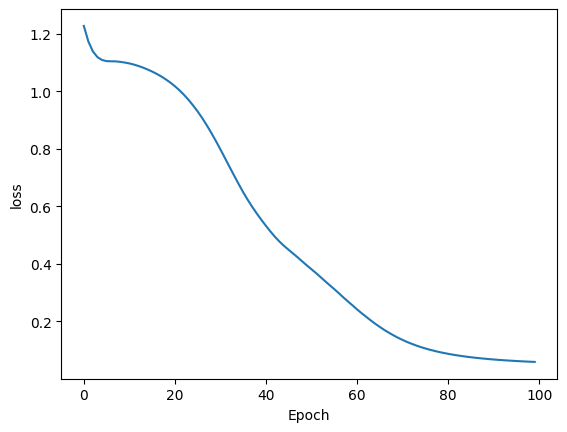

In [ ]:
plt.plot(range(EPOCHS), losses)
plt.ylabel("loss")
plt.xlabel("Epoch")

In [ ]:
with torch.no_grad():
  y_pred = model.forward(X_test)
  loss = criterion(y_pred, y_test)

In [ ]:
loss # nao esta muito bom

tensor(0.0924)

In [ ]:
correct = 0

with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f"{y_test[i]}\t{y_val.argmax().item()}")

    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f" acertamos {correct}")

1	1
1	1
0	0
2	2
2	2
0	0
2	2
2	2
0	0
1	1
2	2
2	1
1	1
0	0
2	2
0	0
2	2
2	2
1	1
0	0
1	1
0	0
0	0
2	2
1	1
2	2
0	0
2	2
1	1
2	2
 acertamos 29


SAVE MODEL

In [ ]:
import pickle

Pkl_Filename = "Pickle_RL_Model.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(model, file)

LOAD MODEL(CLASS AND FUNC NECESSARY)

In [ ]:
with open(Pkl_Filename, 'rb') as file:
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)